# Data Prep with Time Series


In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from acquire import *

###  store items data

In [2]:
# run merge_items_stores_sales from aquire.py 
items_stores_sales = merge_items_stores_sales()

In [3]:
# Check that table imported is what I wanted
items_stores_sales.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10


In [4]:
items_stores_sales.shape

(913000, 16)

1. Convert date column to datetime format.


In [5]:
# convert the sale_date column in our df to pandas datetime object

In [6]:
items_stores_sales['sale_date'] = pd.to_datetime(items_stores_sales.sale_date)

In [7]:
#items_stores_sales.sale_date = pd.to_datetime(items_stores_sales.sale_date.apply(lambda x: x[:-13]))

In [8]:
items_stores_sales.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
1,1,11.0,2013-01-02 00:00:00+00:00,2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
2,1,14.0,2013-01-03 00:00:00+00:00,3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
3,1,13.0,2013-01-04 00:00:00+00:00,4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10
4,1,10.0,2013-01-05 00:00:00+00:00,5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10


2. Plot the distribution of sale_amount and item_price.

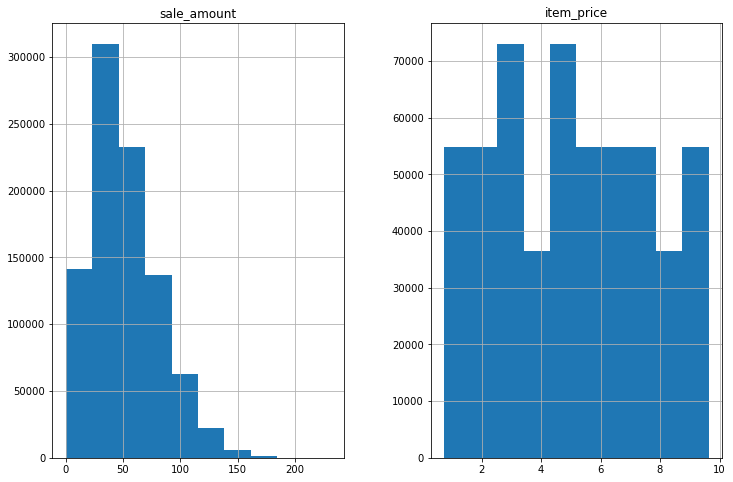

In [9]:
# show dist using histograms
items_stores_sales[['sale_amount', 'item_price']].hist(figsize=(12,8));

3. Set the index to be the datetime variable.

In [10]:
# set index to sale_date

In [11]:
items_stores_sales = items_stores_sales.set_index('sale_date').sort_index()

In [12]:
items_stores_sales.head(1)


,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10


4. Add a 'month' and 'day of week' column to your dataframe.

In [13]:
# add month as a column

In [14]:
items_stores_sales['month'] = items_stores_sales.index.month_name()
items_stores_sales.head(1)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,January


In [15]:
# add day_of_week as column

In [16]:
items_stores_sales['day_of_week'] = items_stores_sales.index.day_name()
items_stores_sales.head(1)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,January,Tuesday


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [17]:
# multiply sale_amount and item_price to get sales_total column

In [18]:
items_stores_sales['sales_total'] = items_stores_sales['sale_amount'] * items_stores_sales['item_price']
items_stores_sales.head(1)

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,January,Tuesday,10.92


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [20]:
def clean_items_stores_sales(): 
   
    # get df
    items_stores_sales = merge_items_stores_sales()
    
    # convert the sale_date column in our df to pandas datetime object
    items_stores_sales['sale_date'] = pd.to_datetime(items_stores_sales.sale_date)
    
    # show dist using histograms
    items_stores_sales[['sale_amount', 'item_price']].hist(figsize=(12,8))
    
    # set index to sale_date
    items_stores_sales = items_stores_sales.set_index('sale_date').sort_index()
    
    # add month as a column
    items_stores_sales['month'] = items_stores_sales.index.month_name()
    
    # add day_of_week as column
    items_stores_sales['day_of_week'] = items_stores_sales.index.day_name()
    
    # multiply sale_amount and item_price to get sales_total column
    items_stores_sales['sales_total'] = items_stores_sales['sale_amount'] * items_stores_sales['item_price']

    
    return items_stores_sales
    
    


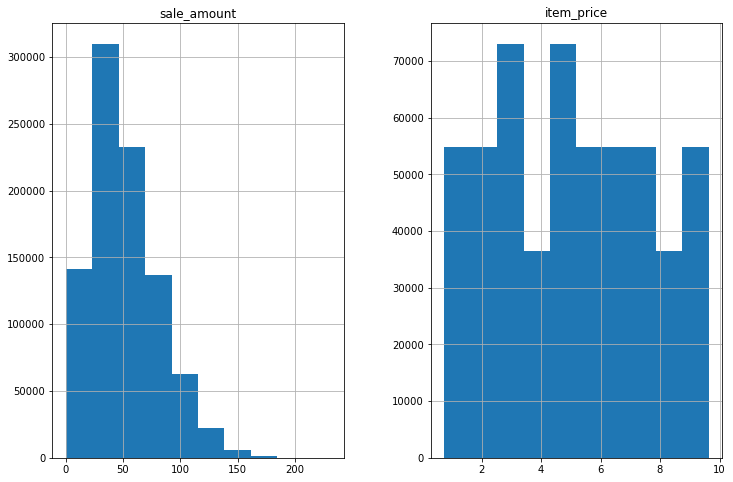

In [21]:
items_stores_sales = clean_items_stores_sales()

In [22]:
items_stores_sales.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,3.520026e+10,3.520026e+10,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12.0,Mueller Sport Care Basic Support Level Medium ...,8.40,7.467664e+10,7.467664e+10,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46.0,Pizza Sauce,4.65,3.545777e+10,3.545777e+10,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12.0,Mueller Sport Care Basic Support Level Medium ...,8.40,7.467664e+10,7.467664e+10,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12.0,Mueller Sport Care Basic Support Level Medium ...,8.40,7.467664e+10,7.467664e+10,January,Tuesday,294.00


### OPS data 

In [23]:
germany_power_data = get_germany_power_csv()

In [24]:
germany_power_data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


1. Convert date column to datetime format.

In [39]:
# convert the Date column in our df to pandas datetime object
germany_power_data['Date'] = pd.to_datetime(germany_power_data.Date)

AttributeError: 'DataFrame' object has no attribute 'Date'

In [29]:
germany_power_data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


2. Plot the distribution of each of your variables.

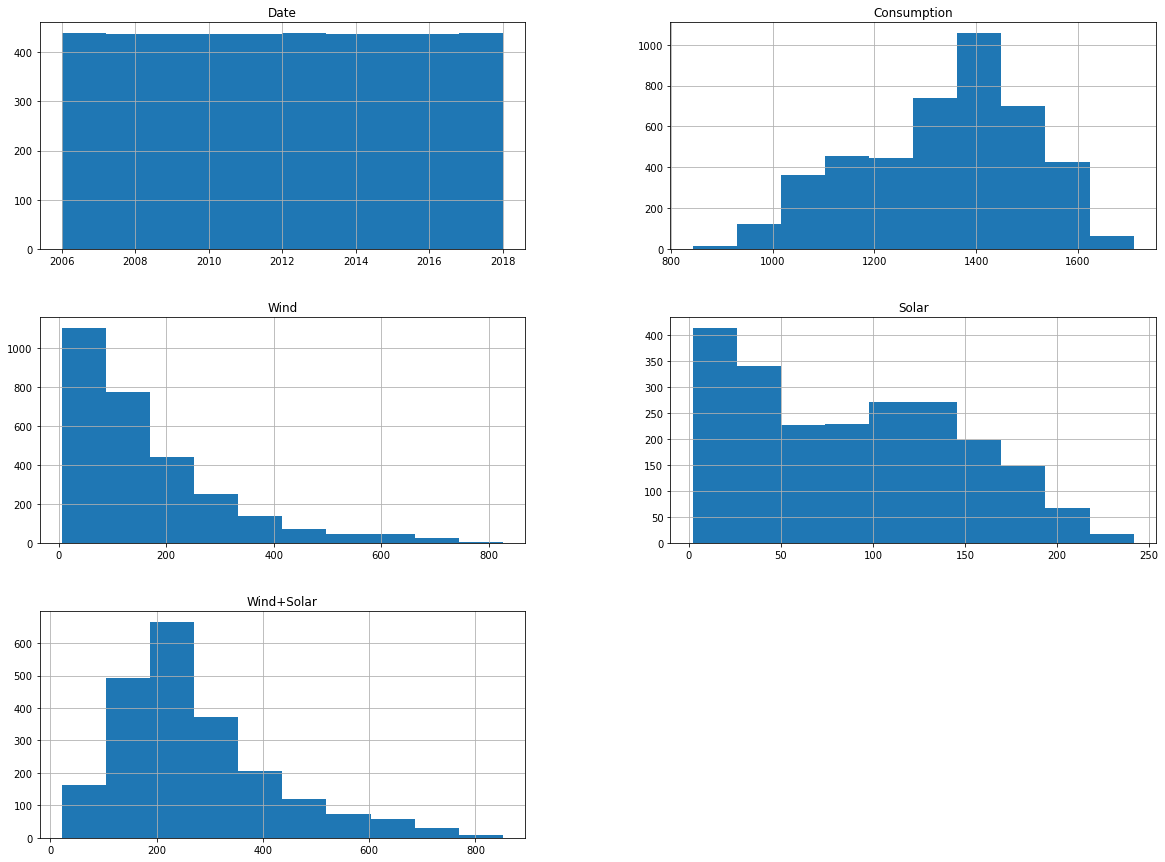

In [30]:
# show dist using histograms
germany_power_data.hist(figsize=(20,15));

3. Set the index to be the datetime variable.


In [31]:
# set index to Date
germany_power_data = germany_power_data.set_index('Date').sort_index()

4. Add a month and a year column to your dataframe.

In [33]:
# add month as a column

In [32]:
germany_power_data['month'] = germany_power_data.index.month_name()
germany_power_data.head(1)

,Consumption,Wind,Solar,Wind+Solar,month
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January


In [34]:
# add year as a column

In [36]:
germany_power_data['year'] = germany_power_data.index.year
germany_power_data.head(1)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006


5. Fill any missing values.


In [38]:
# fillna to fill missing values
germany_power_data.fillna(0, inplace=True)

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [41]:
def clean_germany_power_data(): 
    
    import pandas as pd
    from datetime import timedelta, datetime
    import numpy as np
    import matplotlib.pyplot as plt
    from acquire import get_germany_power_csv
    
    # get df
    germany_power_data = get_germany_power_csv()
    
    # convert the Date column in our df to pandas datetime object
    germany_power_data['Date'] = pd.to_datetime(germany_power_data.Date)
    
    # show dist using histograms
    germany_power_data.hist(figsize=(20,15));
    
    # set index to Date
    germany_power_data = germany_power_data.set_index('Date').sort_index()
    
    # add month as column
    germany_power_data['month'] = germany_power_data.index.month_name()
    
    # add year as column
    germany_power_data['year'] = germany_power_data.index.year
    
    # fillna to fill missing values
    germany_power_data.fillna(0, inplace=True)

    return germany_power_data
    
    
    

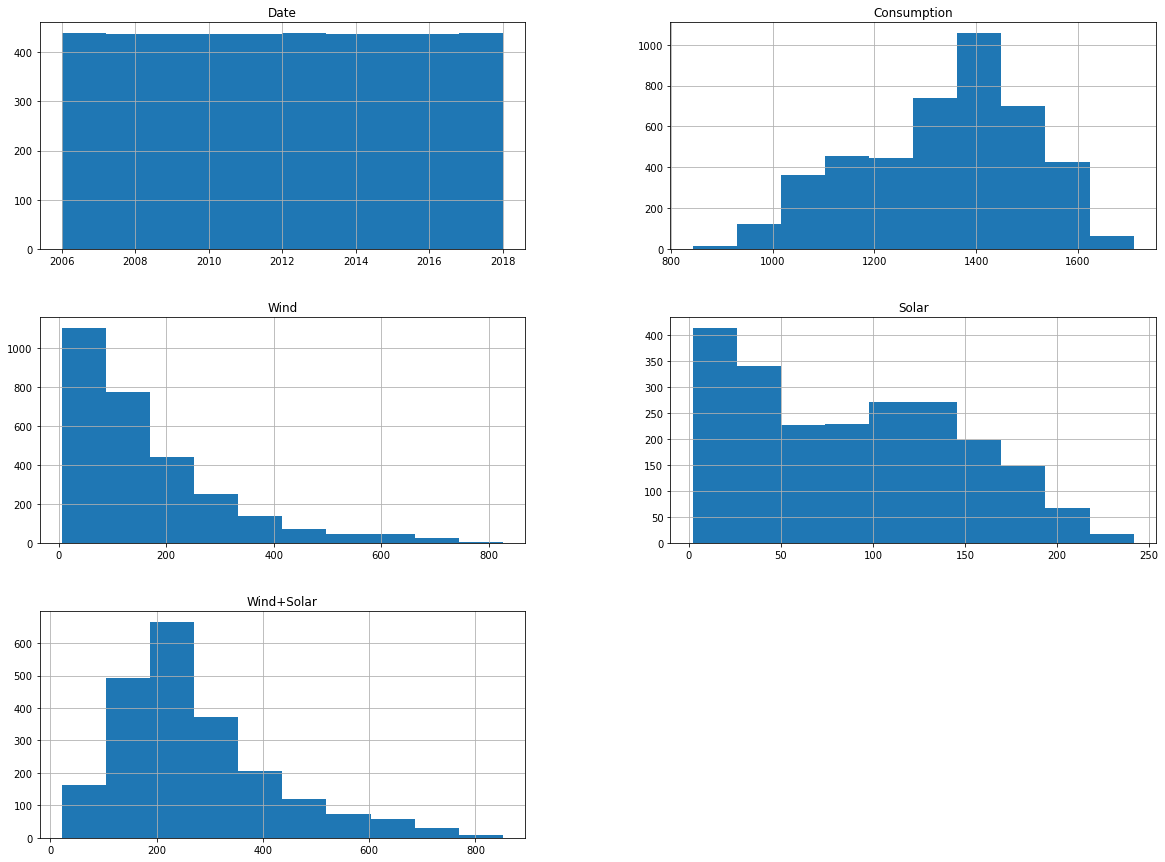

In [42]:
germany_power_data = clean_germany_power_data()


In [43]:
germany_power_data.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006
